# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

**a) Load in hw2data.csv from ../data into a pandas dataframe.**

In [14]:
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('C:/Users/Nicholas/Documents/GitHub/APMAE4990-/data/hw2data.csv')

In [77]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


**b) Set y to be the y variable in the dataframe from a and X to be the remaining features.**

In [6]:
y = data['y']
X = data.drop(['y'], 1)

**c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. **

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal Regularization Strength: 0.006135907273413176


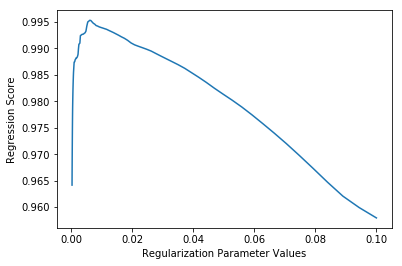

In [28]:
alpha = np.logspace(-3.5, -1, 100) #Suggested range of (-8, -3, 1000) didn't converge to an optimum

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
train_errors = []
test_errors = []
coeffs = []
score = []

for i in alpha:
    
    regr = Lasso(alpha = i)
    regr.fit(X_train, y_train)
    
    train_errors.append(regr.score(X_train,y_train))
    score.append(regr.score(X_test,y_test))
    coeffs.append(regr.coef_)
    
plt.plot(alpha, score)
plt.xlabel('Regularization Parameter Values')
plt.ylabel('Regression Score')
test_errors = score
alpha_best = alpha[np.argmax(score)]
print('Optimal Regularization Strength:', alpha_best)

The optimal regularization parameter has a value of 0.00614.

**d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.**

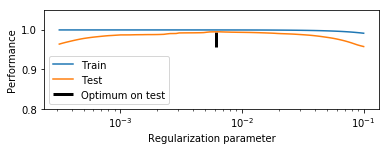

In [78]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in
# alphas = []
# train_errors=[]
# test_errors=[]
# alpha_optim=0

plt.semilogx(alpha, train_errors, label='Train')
plt.semilogx(alpha, test_errors, label='Test')
plt.vlines(alpha_best, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label = 'Optimum on test')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.legend(loc = 3)
plt.ylim([0.8, 1.05])
plt.show()


The test performance is best when the regularization parameter is set to the value found in the previous question (alpha_best = 0.00614).

**e) Plot the top coefficients based on this optimal parameter. Why do you think so many are zero? **

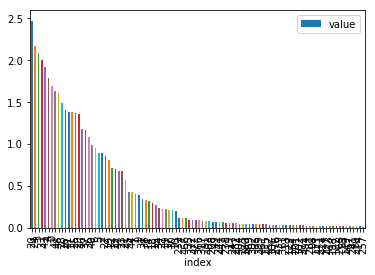

In [81]:
regr = Lasso(alpha = alpha_best)
regr.fit(X_train, y_train)

coefficients = pd.DataFrame({'index':range(len(regr.coef_)), 'value':abs(regr.coef_)})
coefficients = coefficients.sort_values('value', ascending = False)
coefficients[:100].plot(x = 'index', y = 'value', kind = 'bar')

The barplot above shows the values of the top 50 coefficients by *absolute* magnitude. Most coefficients are set to zero after LASSO regularization because they are irrelevant features for prediction. 

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

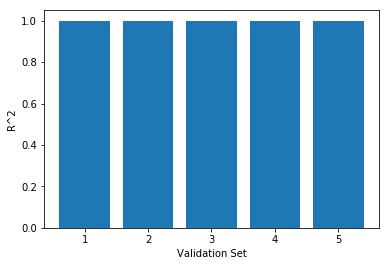

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regr, X, y, cv = 5)
plt.xlabel('Validation Set')
plt.ylabel('R^2')
plt.bar(range(1,6),scores)
plt.show()

The model seems to work very well on the 5-fold cross validation. The $R^2$ value for all 5 validation sets are very close to 1, which means almost 100% of the variance is explained by the model with the regularization parameter.

**g) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficients obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. **

In [73]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y), Lasso, alpha = alpha_best)

In [74]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

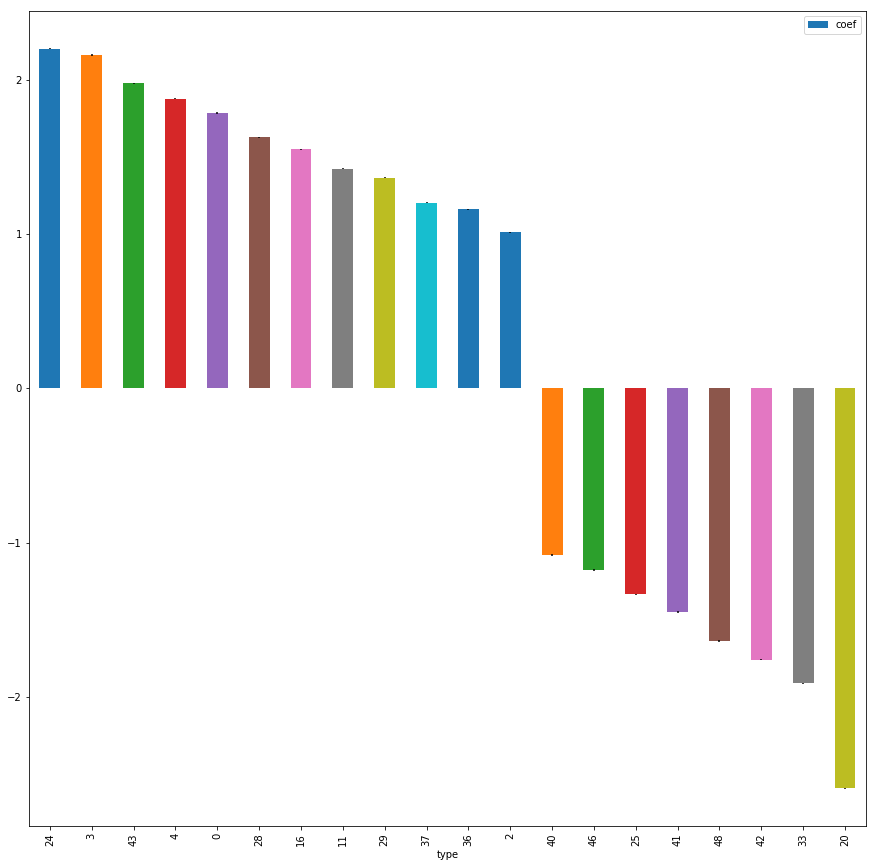

In [76]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))